In [170]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_American_football_stadiums_by_capacity"

page = urllib.request.urlopen(url)

soup = BeautifulSoup(page, "lxml")

right_table = soup.find_all('table', class_="wikitable sortable plainrowheaders")
# print(right_table[0])

# Capacity
A=[]
#Capacity after new line removed
AA=[]

#City
B=[]


#State/Province
C=[]

#Home teams
D=[]

# Stadium Name
E=[]


for row in right_table[0].findAll('tr'):
    cells=row.findAll('td')
    headers=row.findAll('th')
    if len(cells)==6:
        A.append(cells[1].find(text=True))
        B.append(cells[2].find(text=True))
        C.append(cells[3].find(text=True))
        D.append(cells[4].find(text=True))
        E.append(headers[0].find(text=True))

#take off new line character from html
for i in A:
	num = i[:-1]
	AA.append(num)




df=pd.DataFrame(E,columns=['Stadium Name'])
df['Capacity']=AA
df['City']=B
df['State/Province']=C
df['Home Teams']=D

print(df)

df.to_csv('American_Football_Stadiums_Capacity.csv')




             






                       Stadium Name Capacity             City State/Province  \
0                  Michigan Stadium  107,601              Ann       Michigan   
1                    Beaver Stadium  102,572  University Park   Pennsylvania   
2                      Ohio Stadium  102,780         Columbus           Ohio   
3                        Kyle Field  102,733  College Station          Texas   
4                   Neyland Stadium  102,455        Knoxville      Tennessee   
..                              ...      ...              ...            ...   
146  InfoCision Stadium–Summa Field   30,000            Akron           Ohio   
147    William "Dick" Price Stadium   30,000          Norfolk       Virginia   
148                  Cessna Stadium   30,000          Wichita         Kansas   
149  Benson Field at Yulman Stadium   30,000      New Orleans      Louisiana   
150              Joe Aillet Stadium   28,562           Ruston      Louisiana   

                        Home Teams  
0 

In [171]:
from matplotlib import pyplot as plt

In [172]:
# The data was saved with commas separating the thousands, for example '999,999'
# The capacity data is stored as a string because of this, which means I cannot use the sum function to add the data together
# The thousands=',' parameter automatically removes these commas
df = pd.read_csv('American_Football_Stadiums_Capacity.csv', sep=',', thousands=',')

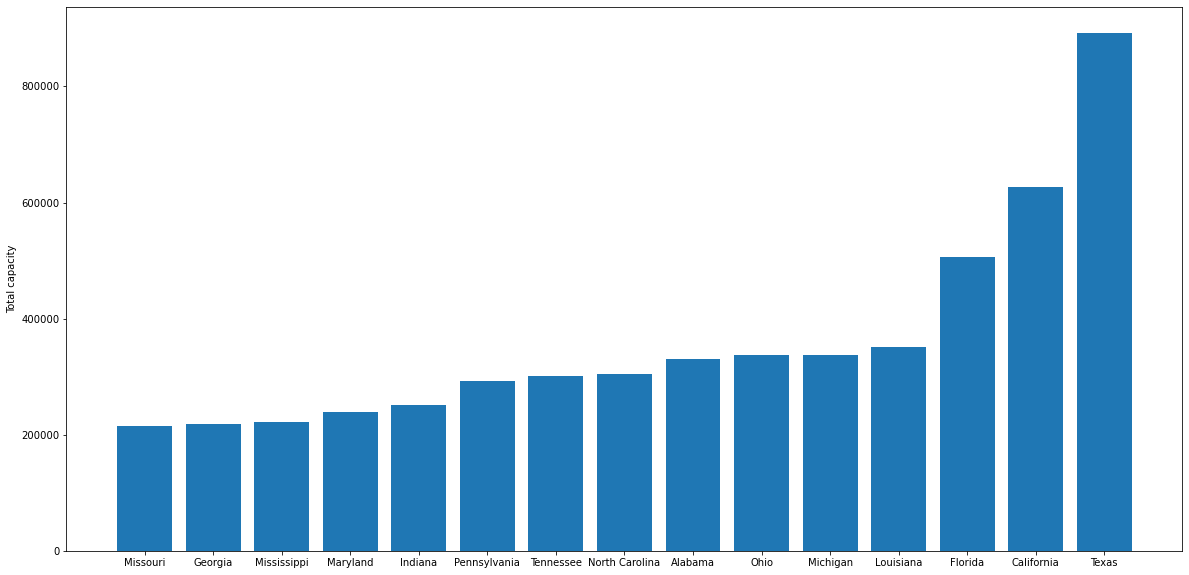

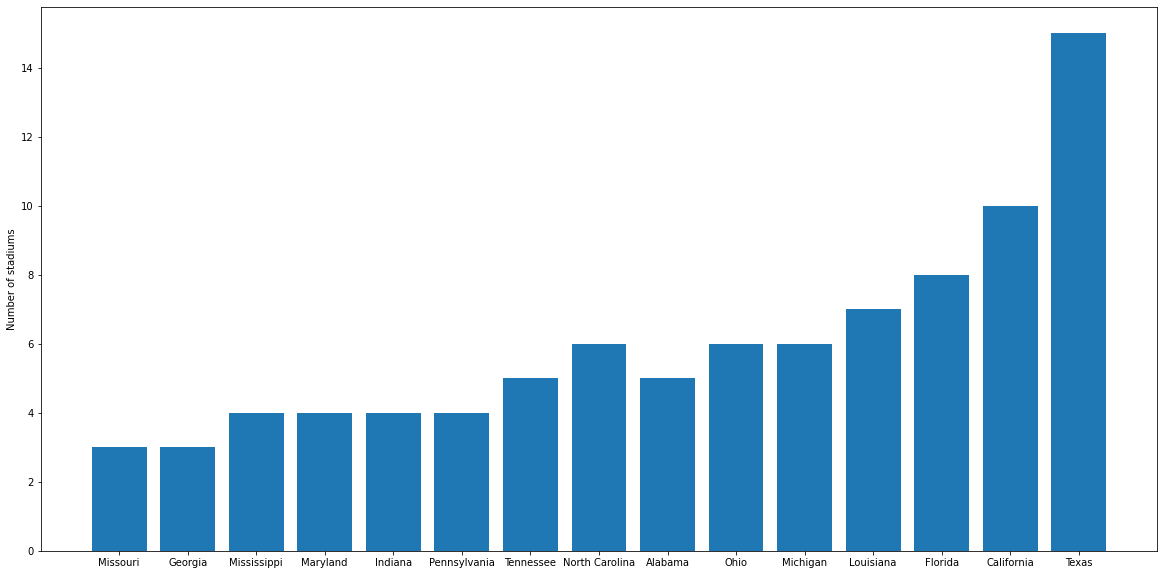

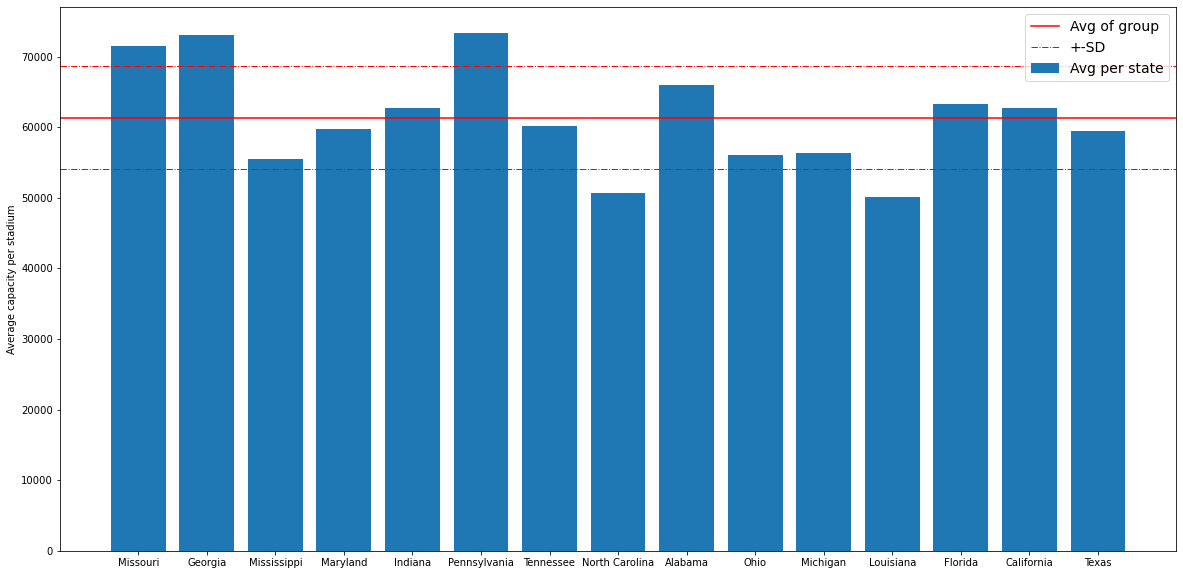

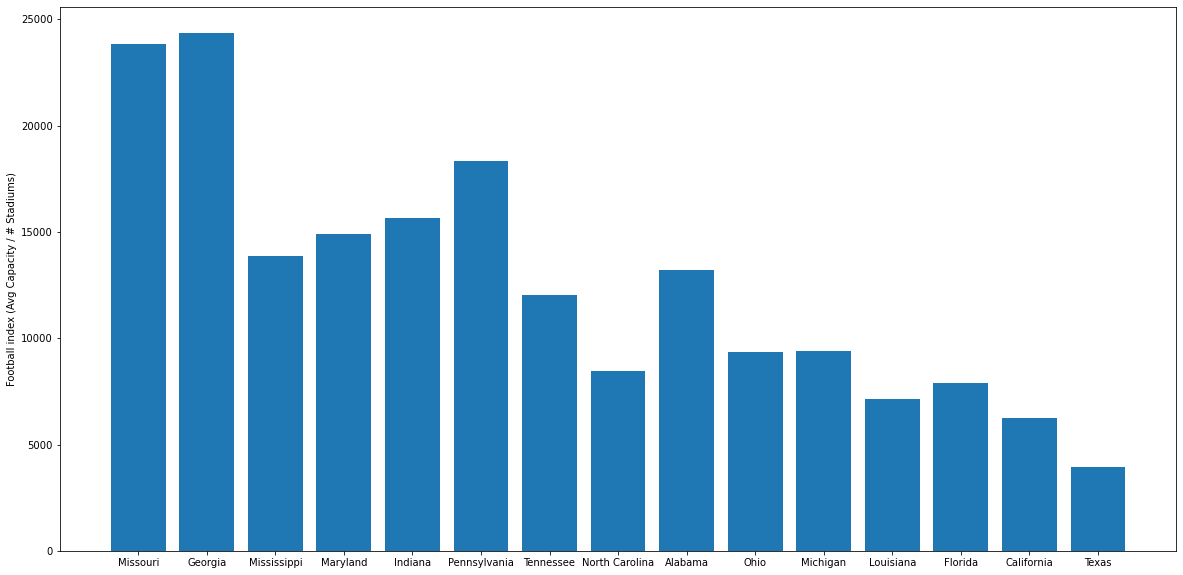

Average stadium capacity of all stadiums in this group: 61379
Standard deviation for average capacity of each stadium per state in this group: 7313


In [308]:
# Number of states to display
NUM_STATES = 15

# Group data by state
group_states = df.groupby(['State/Province'])

# Combined capacity of all stadiums per state
sum_capacity = group_states['Capacity'].sum()

# Number of stadiums per state
num_stadiums = group_states['Capacity'].count()

# Average capacity of stadiums per state
avg_capacity = group_states['Capacity'].mean()

football_index = avg_capacity / num_stadiums

# Sum capacity by state in descending order and then limited to a maximum of NUM_STATES
sum_capacity_lim = sum_capacity.sort_values(ascending=False)[:NUM_STATES][::-1]

# Number of stadiums by state, limited to selected states in sum_capacity_lim
num_stadiums_lim = pd.Series(dtype='int64')
avg_capacity_lim = pd.Series(dtype='int64')
football_index_lim = pd.Series(dtype='int64')
for state in sum_capacity_lim.index.tolist():
    num_stadiums_lim[state] = num_stadiums[state]
    avg_capacity_lim[state] = avg_capacity[state]
    football_index_lim[state] = football_index[state]
    
# Average capacity of ALL stadiums in this group
avg_capacity_all = round(avg_capacity_lim.mean())

# Standard deviation for average capacity of each stadium per state in this group
avg_capacity_std = round(avg_capacity_lim.std())

# Plot total capacity per state
plt.figure(figsize=(20, 10))
plt.bar(sum_capacity_lim.index, sum_capacity_lim)
plt.ylabel('Total capacity')
plt.show()

# Plot number of stadiums per state
plt.figure(figsize=(20, 10))
plt.bar(num_stadiums_lim.index, num_stadiums_lim)
plt.ylabel('Number of stadiums')
plt.show()

# Plot average capacity of each stadium per state
plt.figure(figsize=(20, 10))
plt.ylabel('Average capacity per stadium')

plt.bar(avg_capacity_lim.index, avg_capacity_lim, label='Avg per state')
plt.axhline(y=avg_capacity_all, color='r', linestyle='-', label='Avg of group')
plt.axhline(y=avg_capacity_all+avg_capacity_std, color='r', linestyle='-.', label='+-SD', linewidth=1)
plt.axhline(y=avg_capacity_all-avg_capacity_std, color='r', linestyle='-.', linewidth=1)

plt.legend(fontsize=14)
plt.show()

# Plot football index
plt.figure(figsize=(20, 10))
plt.bar(football_index_lim.index, football_index_lim)
plt.ylabel('Football index (Avg Capacity / # Stadiums)')
plt.show()

print(f'Average stadium capacity of all stadiums in this group: {avg_capacity_all}')
print(f'Standard deviation for average capacity of each stadium per state in this group: {avg_capacity_std}')

In [ ]:
"""
    Some extra data for the top 10:
            Rough idea of population:
                High:
                    1st California,
                    2nd Texas,
                    3rd Florida
                Medium:
                    5th Pennsylvania,
                    7th Ohio,
                    9th North Carolina,
                    10th Michigan,
                    16th Tennessee
                Low:
                    24th Alabama,
                    25th Louisiana

            Rough idea of size:
                High:
                    2nd Texas,
                    3rd California,
                Medium:
                    11th Michigan,
                    22nd Florida
                Low:
                    28th North Carolina
                    30th Alabama,
                    31st Louisiana,
                    33st Pennsylvania
                    34th Ohio
                    36th Tennessee

    Notes:
        Football index (Average capacity / Number of stadiums) is the closest I can get to approximating the relative enjoyment of football from
        state to state without proper population or size data. Essentially, for this number to be high, a state must be small enough to not have
        many stadiums, but enjoy football enough to have very large stadiums. Naturally the top places in the list will be taken by the largest/
        most populous states, but as you go further down the list smaller states are able to win out through stadium size.
    
        Texas, California, and Florida being high on the list is not surprising due to sheer size and population.
        This is not indicative of a higher interest in football.
        
        There are some interesting cases, such as high population/low size states such as Pennsylvania, which have a relatively high football
        index. Alabama is a case of a relatively low population/low size with a surprisingly football index, showing a possible higher
        interest in football.
        
"""